In [105]:
#!pip install mgwr

In [104]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

import os
import json
import numpy as np
import geopandas as gpd
import re
import string
import unicodedata
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
from matplotlib import figure
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap
import libpysal as ps
import matplotlib as mpl
#import mapclassify

In [2]:
#!pip install geopandas

# **Load the Data**

## Housing Price

In [55]:
cols = ['Code','Area','Housing_Average'] 
df_housing = pd.read_csv('https://raw.githubusercontent.com/HaofuW/Dissertation_Analysis/main/M_Linear_Regression/Data/housingprice_MSOA_mean_2017average.csv?token=GHSAT0AAAAAABXL3IKPN7WZFTKTA5O4UDQAYXOOT4Q', usecols = cols)
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code             983 non-null    object 
 1   Area             983 non-null    object 
 2   Housing_Average  983 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.2+ KB


## Centrality

### Closeness with weight

In [21]:
cols = ['MSOA11CD','MSOA11NM','CC_w_MSOA']
df_cc_w = pd.read_csv('https://raw.githubusercontent.com/HaofuW/Dissertation_Analysis/main/M_Linear_Regression/Data/CC_w_MSOA.csv?token=GHSAT0AAAAAABXL3IKPHRS3IVVYCQIEUMWQYXON32Q', usecols = cols)
df_cc_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MSOA11CD   979 non-null    object 
 1   MSOA11NM   979 non-null    object 
 2   CC_w_MSOA  979 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.1+ KB


## Air Quality & Crime Rate

In [10]:
cols = ['MSOA Code', 'MSOA Name', 'crime_rate', 'NOx_index']
df_air_crime = pd.read_csv('https://raw.githubusercontent.com/HaofuW/Dissertation_Analysis/main/M_Linear_Regression/Data/Crime_Air_MSOA.csv?token=GHSAT0AAAAAABXL3IKOIRMCVCRKWTMFCFZGYXOKTVQ', usecols = cols)
df_air_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MSOA Code   983 non-null    object 
 1   MSOA Name   984 non-null    object 
 2   crime_rate  983 non-null    float64
 3   NOx_index   983 non-null    float64
dtypes: float64(2), object(2)
memory usage: 30.9+ KB


## Schools

In [11]:
cols = ['MSOA11CD', 'MSOA11NM', 'Num_Schools_MSOA']
df_schools = pd.read_csv('https://raw.githubusercontent.com/HaofuW/Dissertation_Analysis/main/M_Linear_Regression/Data/LondonSchools_MSOA_counts.csv?token=GHSAT0AAAAAABXL3IKPNMJRFX363HIKCITAYXOKXRA', usecols = cols)
df_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MSOA11CD          979 non-null    object
 1   MSOA11NM          979 non-null    object
 2   Num_Schools_MSOA  979 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 23.1+ KB


## Distance between the MSOA

In [12]:
df_MSOA_distance = pd.read_csv('https://raw.githubusercontent.com/HaofuW/Dissertation_Analysis/main/M_Linear_Regression/Data/Distance_to_Centre_MSOA.csv?token=GHSAT0AAAAAABXL3IKOH22FEHVFGX42WFOQYXOKY4A')
df_MSOA_distance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         983 non-null    object 
 1   E02000001  983 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.5+ KB


## Green & Blue Rate

In [56]:
cols = ['MSOA11CD', 'MSOA11NM', 'percent_green_blue']
df_green = pd.read_csv('https://raw.githubusercontent.com/HaofuW/Dissertation_Analysis/main/M_Linear_Regression/Data/London_Green_Blue_Rate_MSOA.csv?token=GHSAT0AAAAAABXL3IKOZOWH334NRUWBK2QAYXOOUQA', usecols = cols)
df_green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSOA11CD            983 non-null    object 
 1   MSOA11NM            983 non-null    object 
 2   percent_green_blue  983 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.2+ KB


# **Data Merging**

In [57]:
df_housing_cc = pd.merge(df_housing, df_cc_w, left_on = 'Code', right_on = 'MSOA11CD', how = 'inner')
df_housing_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code             979 non-null    object 
 1   Area             979 non-null    object 
 2   Housing_Average  979 non-null    float64
 3   MSOA11CD         979 non-null    object 
 4   MSOA11NM         979 non-null    object 
 5   CC_w_MSOA        979 non-null    float64
dtypes: float64(2), object(4)
memory usage: 53.5+ KB


In [58]:
df_housing_cc_air_crime = pd.merge(df_housing_cc, df_air_crime, left_on = 'Code', right_on = 'MSOA Code', how = 'inner')
df_housing_cc_air_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 946
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code             947 non-null    object 
 1   Area             947 non-null    object 
 2   Housing_Average  947 non-null    float64
 3   MSOA11CD         947 non-null    object 
 4   MSOA11NM         947 non-null    object 
 5   CC_w_MSOA        947 non-null    float64
 6   MSOA Code        947 non-null    object 
 7   MSOA Name        947 non-null    object 
 8   crime_rate       946 non-null    float64
 9   NOx_index        947 non-null    float64
dtypes: float64(4), object(6)
memory usage: 81.4+ KB


In [59]:
df_housing_cc_air_crime_schools = pd.merge(df_housing_cc_air_crime, df_schools, left_on = 'Code', right_on = 'MSOA11CD', how = 'inner')
df_housing_cc_air_crime_schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 946
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              947 non-null    object 
 1   Area              947 non-null    object 
 2   Housing_Average   947 non-null    float64
 3   MSOA11CD_x        947 non-null    object 
 4   MSOA11NM_x        947 non-null    object 
 5   CC_w_MSOA         947 non-null    float64
 6   MSOA Code         947 non-null    object 
 7   MSOA Name         947 non-null    object 
 8   crime_rate        946 non-null    float64
 9   NOx_index         947 non-null    float64
 10  MSOA11CD_y        947 non-null    object 
 11  MSOA11NM_y        947 non-null    object 
 12  Num_Schools_MSOA  947 non-null    int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 103.6+ KB


In [60]:
df_housing_cc_air_crime_schools_distance = pd.merge(df_housing_cc_air_crime_schools, df_MSOA_distance, left_on = 'Code', right_on = 'ID', how = 'inner')
df_housing_cc_air_crime_schools_distance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 946
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              947 non-null    object 
 1   Area              947 non-null    object 
 2   Housing_Average   947 non-null    float64
 3   MSOA11CD_x        947 non-null    object 
 4   MSOA11NM_x        947 non-null    object 
 5   CC_w_MSOA         947 non-null    float64
 6   MSOA Code         947 non-null    object 
 7   MSOA Name         947 non-null    object 
 8   crime_rate        946 non-null    float64
 9   NOx_index         947 non-null    float64
 10  MSOA11CD_y        947 non-null    object 
 11  MSOA11NM_y        947 non-null    object 
 12  Num_Schools_MSOA  947 non-null    int64  
 13  ID                947 non-null    object 
 14  E02000001         947 non-null    float64
dtypes: float64(5), int64(1), object(9)
memory usage: 118.4+ KB


In [61]:
df = pd.merge(df_housing_cc_air_crime_schools_distance, df_green, left_on = 'Code', right_on = 'MSOA11CD', how = 'inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 946
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                947 non-null    object 
 1   Area                947 non-null    object 
 2   Housing_Average     947 non-null    float64
 3   MSOA11CD_x          947 non-null    object 
 4   MSOA11NM_x          947 non-null    object 
 5   CC_w_MSOA           947 non-null    float64
 6   MSOA Code           947 non-null    object 
 7   MSOA Name           947 non-null    object 
 8   crime_rate          946 non-null    float64
 9   NOx_index           947 non-null    float64
 10  MSOA11CD_y          947 non-null    object 
 11  MSOA11NM_y          947 non-null    object 
 12  Num_Schools_MSOA    947 non-null    int64  
 13  ID                  947 non-null    object 
 14  E02000001           947 non-null    float64
 15  MSOA11CD            947 non-null    object 
 16  MSOA11NM

In [62]:
df.drop(df[((df.crime_rate.isna()))].index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 1 to 946
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                946 non-null    object 
 1   Area                946 non-null    object 
 2   Housing_Average     946 non-null    float64
 3   MSOA11CD_x          946 non-null    object 
 4   MSOA11NM_x          946 non-null    object 
 5   CC_w_MSOA           946 non-null    float64
 6   MSOA Code           946 non-null    object 
 7   MSOA Name           946 non-null    object 
 8   crime_rate          946 non-null    float64
 9   NOx_index           946 non-null    float64
 10  MSOA11CD_y          946 non-null    object 
 11  MSOA11NM_y          946 non-null    object 
 12  Num_Schools_MSOA    946 non-null    int64  
 13  ID                  946 non-null    object 
 14  E02000001           946 non-null    float64
 15  MSOA11CD            946 non-null    object 
 16  MSOA11NM

In [63]:
df.drop(columns=['MSOA11CD_x','MSOA11NM_x','MSOA Code','MSOA Name','MSOA11CD_y','MSOA11NM_y', 'ID', 'MSOA11CD', 'MSOA11NM'], inplace=True)
df

,Code,Area,Housing_Average,CC_w_MSOA,crime_rate,NOx_index,Num_Schools_MSOA,E02000001,percent_green_blue
1,E02000002,Barking and Dagenham 001,"291,021.2500",3.6677,77.0000,74.0000,2,"18,021.7922",63.2899
2,E02000003,Barking and Dagenham 002,"316,439.5000",3.7420,77.0000,82.0000,3,"17,492.3029",63.2899
3,E02000004,Barking and Dagenham 003,"333,975.7500",3.4917,44.0000,70.0000,1,"19,200.5379",60.8228
4,E02000005,Barking and Dagenham 004,"325,209.7500",3.7710,68.0000,82.0000,3,"17,137.5400",38.8975
5,E02000007,Barking and Dagenham 006,"287,400.7500",3.6613,102.0000,78.0000,2,"17,963.6887",50.2862
...,...,...,...,...,...,...,...,...,...
942,E02000979,Westminster 020,"1,548,152.7500",6.3821,236.0000,166.0000,10,"3,432.0188",34.2539
943,E02000980,Westminster 021,"1,719,413.5000",6.3602,72.0000,144.0000,5,"3,696.8483",29.7960
944,E02000981,Westminster 022,"1,041,675.2500",6.2835,84.0000,146.0000,2,"4,361.9034",11.1445
945,E02000982,Westminster 023,"1,221,842.7500",6.2528,238.0000,158.0000,4,"4,726.0119",29.1860


In [89]:
#df.to_csv(r'DF_Mulit_Regression.csv', index = False)

# **Analysis**

## Correlation Matrix

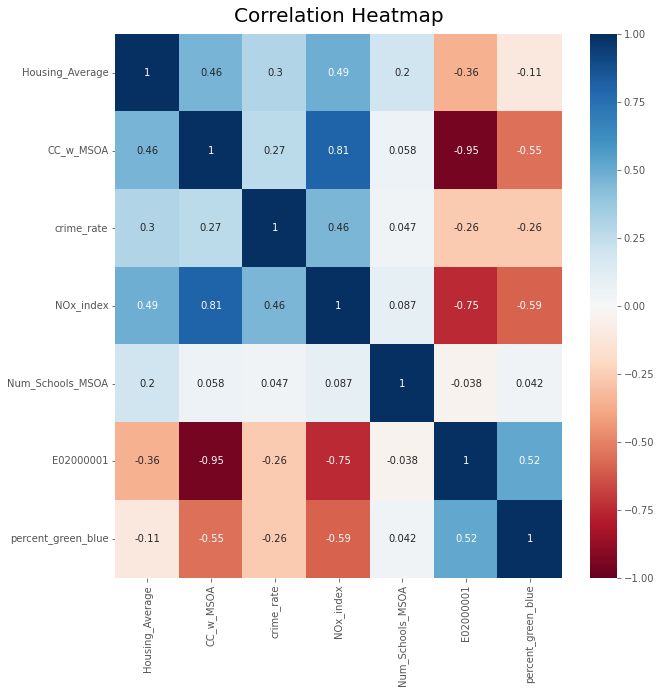

In [64]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap = 'RdBu')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

## Basic Plotting

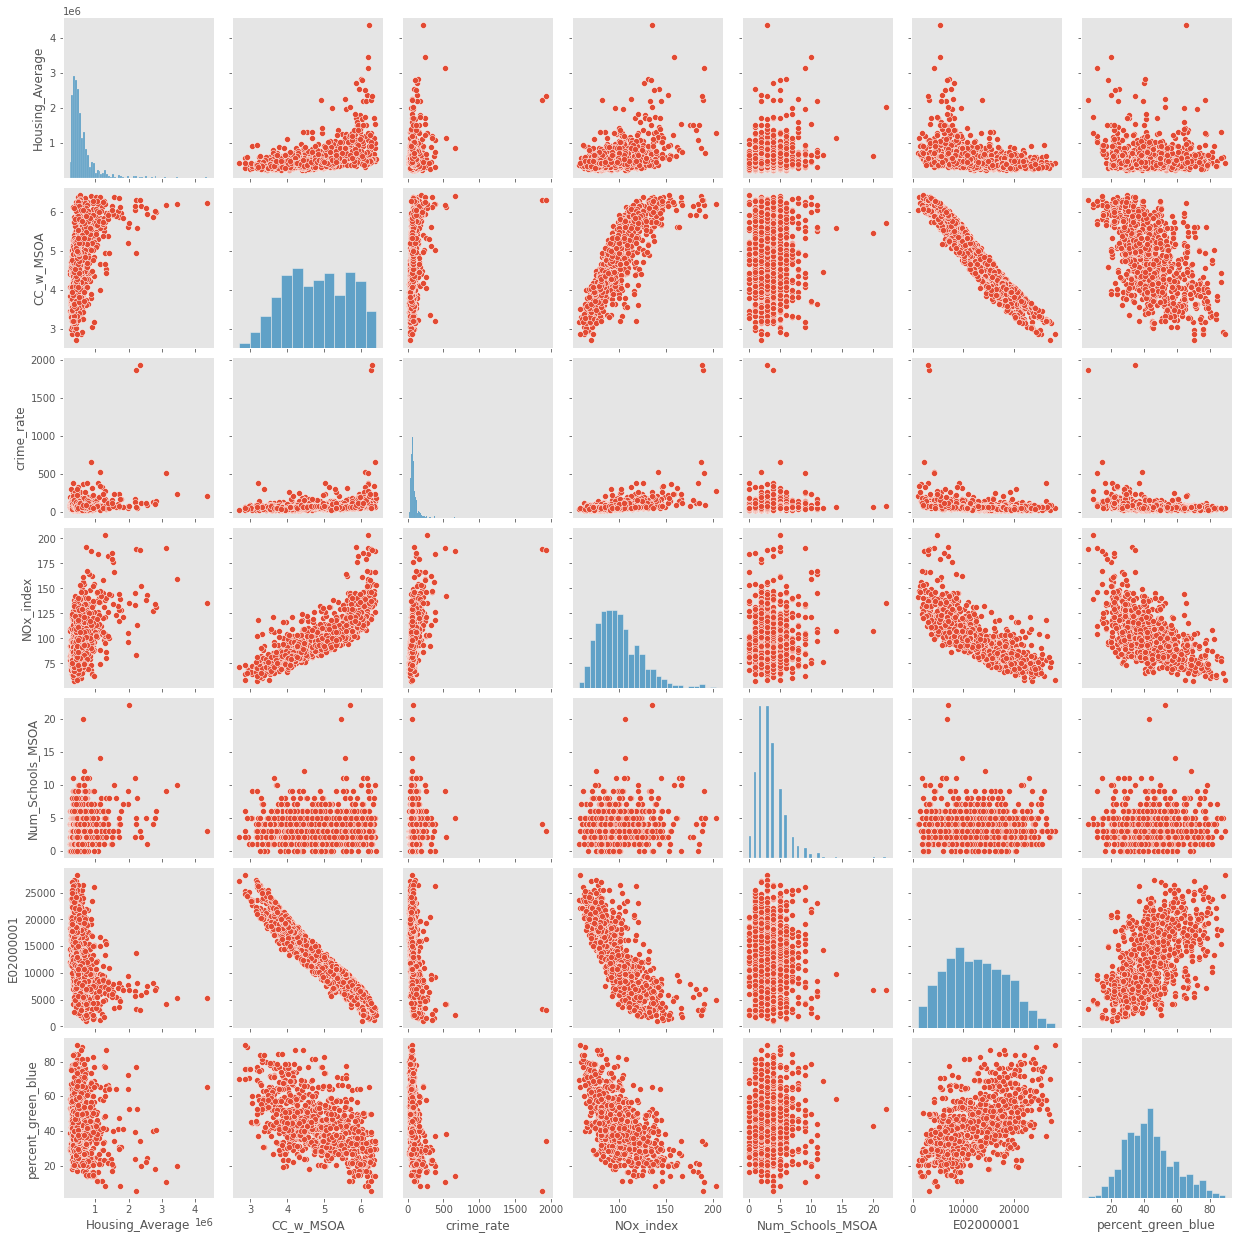

In [65]:
sns.pairplot(df)
plt.show()

## Regression

In [87]:
model = sm.formula.ols('Housing_Average ~ CC_w_MSOA + crime_rate + NOx_index + Num_Schools_MSOA + + E02000001+ percent_green_blue', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Housing_Average   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     104.8
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          5.37e-101
Time:                        13:34:44   Log-Likelihood:                -13271.
No. Observations:                 946   AIC:                         2.656e+04
Df Residuals:                     939   BIC:                         2.659e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.401e+06   2.57e+05    -13.232      0.000   -3.91e+06    -2.9e+06
CC_w_MSOA           5.037e+05   4.33e+04     11.626      0.000    4.19e+05    5.89e+05
crime_rate           591.0041    112.387      5.259      0.000     370.446     811.563
NOx_index           4631.9741    865.593      5.351      0.000    2933.252    6330.696
Num_Schools_MSOA    2.179e+04   4443.177      4.904      0.000    1.31e+04    3.05e+04
E02000001             54.0658      5.579      9.690      0.000      43.117      65.015
percent_green_blue  7140.5384    808.074      8.836      0.000    5554.698    8726.379
==============================================================================
Omnibus:                      731.472   Durbin-Watson:                   1.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19394.493
Skew:                           3.292   Prob(JB):                         0.00
Kurtosis:                      24.182   Cond. No.                     3.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
p_value    = model.f_pvalue
R_squared  = model.rsquared
print("R_squared  =", R_squared)
print("p_value    =", p_value)

R_squared  = 0.4010765707215581
p_value    = 5.37092634356964e-101


### Regression with log 

In [100]:
model = sm.formula.ols('Housing_Average.apply(np.log) ~ CC_w_MSOA.apply(np.log) + crime_rate + NOx_index + Num_Schools_MSOA + E02000001 + percent_green_blue', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Housing_Average.apply(np.log)   R-squared:                       0.463
Model:                                       OLS   Adj. R-squared:                  0.459
Method:                            Least Squares   F-statistic:                     134.8
Date:                           Sat, 06 Aug 2022   Prob (F-statistic):          5.18e-123
Time:                                   13:49:15   Log-Likelihood:                -294.02
No. Observations:                            946   AIC:                             602.0
Df Residuals:                                939   BIC:                             636.0
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.5665      0.382     17.174      0.000       5.816       7.317
CC_w_MSOA.apply(np.log)     2.9718      0.209     14.193      0.000       2.561       3.383
crime_rate                  0.0003      0.000      2.580      0.010    7.67e-05       0.001
NOx_index                   0.0065      0.001      7.200      0.000       0.005       0.008
Num_Schools_MSOA            0.0211      0.005      4.303      0.000       0.011       0.031
E02000001                6.459e-05   6.06e-06     10.667      0.000    5.27e-05    7.65e-05
percent_green_blue          0.0100      0.001     11.143      0.000       0.008       0.012
==============================================================================
Omnibus:                       84.068   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.915
Skew:                           0.696   Prob(JB):                     6.75e-26
Kurtosis:                       4.001   Cond. No.                     5.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### VIF

In [71]:
def vif(df, col_i):
    """
    df: 整份数据
    col_i：被检测的列名
    """
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, df).fit().rsquared
    return 1. / (1. - r2)

In [80]:
df_vif = df.drop(['Code','Area'], axis = 1)

In [81]:
from statsmodels.formula.api import ols

for i in df_vif.columns:
    print(i, '\t', vif(df=df_vif, col_i=i))

Housing_Average 	 1.669662516299886
CC_w_MSOA 	 17.101176079963956
crime_rate 	 1.3583684791160482
NOx_index 	 4.088204892244918
Num_Schools_MSOA 	 1.049613508676538
E02000001 	 12.505883586373198
percent_green_blue 	 1.723842509820663


In [82]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [83]:
drop_column_using_vif_

<function __main__.drop_column_using_vif_>

In [ ]:
# using VIF on the new_obesity_VIF_Process_1 dataset
df_vif_remain = drop_column_using_vif_(df_vif.drop('Life_expectancy', axis=1))

print("The columns remaining after VIF selection are:")
print(df_all_vif.columns)

### PCA